In [7]:
#importing packages
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os   
from zipfile import ZipFile
from data_API_downloader import Downloader
from region_splitter import Region_finder
import geopandas
from shapely import geometry
from shapely.geometry import Point
import folium

In [8]:
download = Downloader(2020,11)

In [9]:
data = download.get_multiple_years([2021,2022,2023])

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
404
404
404
404
404
404


In [10]:
data

id          x          y     mp  \
0        14124483  16.048542  48.856294  False   
1        14124483  16.048542  48.856294  False   
2        14395672  13.653720  50.505224  False   
3        14395672  13.653720  50.505224  False   
4        14407590  18.304837  49.658601  False   
...           ...        ...        ...    ...   
9904446  21510153  14.313285  50.058536  False   
9904447  21510153  14.313285  50.058536  False   
9904448  21510154  14.398062  50.061832  False   
9904449  21510154  14.398062  50.061832  False   
9904450  21510154  14.398062  50.061832  False   

                                   date  state  relevance  types  
0        2021-01-26T22:38:00.0000+01:00      1          4     77  
1        2021-01-26T22:38:00.0000+01:00      1          4     97  
2        2021-01-06T14:01:00.0000+01:00      1          2     80  
3        2021-01-06T14:01:00.0000+01:00      1          2     81  
4        2021-01-28T09:27:00.0000+01:00      1          4     55  
...                                 ...    ...        ...    ...  
9904446  2023-06-16T15:25:00.0000+02:00      1          4     97  
9904447  2023-06-16T15:25:00.0000+02:00      1          4    120  
9904448  2023-06-16T22:20:00.0000+02:00      1          4     74  
9904449  2023-06-16T22:20:00.0000+02:00      1          4     97  
9904450  2023-06-16T22:20:00.0000+02:00      1          4    120  

[9904451 rows x 8 columns]

In [15]:
geojson = geopandas.read_file("ORP_P.shp",encoding = "Windows-1250")
geojson.crs


<Projected CRS: EPSG:5514>
Name: S-JTSK / Krovak East North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Europe - Czechoslovakia
- bounds: (12.09, 47.73, 22.56, 51.06)
Coordinate Operation:
- name: Krovak East North (Greenwich)
- method: Krovak (North Orientated)
Datum: System of the Unified Trigonometrical Cadastral Network
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [16]:
reprojected = geojson.to_crs(epsg=4326)
reprojected

KOD                 NAZEV OKRES_KOD NUTS3_KOD SPR_OB_KOD  \
0     761                 Kadaň      3503     CZ042     563102   
1     779    Jablonec nad Nisou      3504     CZ051     563510   
2     787               Tanvald      3504     CZ051     563820   
3     795          Železný Brod      3504     CZ051     563871   
4     809              Frýdlant      3505     CZ051     564028   
..    ...                   ...       ...       ...        ...   
201  2020               Šumperk      3809     CZ071     523704   
202  2038  Rožnov pod Radhoštěm      3810     CZ072     544841   
203  2046     Valašské Meziříčí      3810     CZ072     545058   
204  2054                Vsetín      3810     CZ072     541630   
205  2062               Jeseník      3811     CZ071     536385   

                                              geometry  
0    POLYGON ((13.43356 50.36894, 13.43005 50.36210...  
1    POLYGON ((15.15200 50.84060, 15.16443 50.84090...  
2    POLYGON ((15.23190 50.82697, 15.24458 50.82463...  
3    POLYGON ((15.32375 50.67244, 15.32655 50.66461...  
4    POLYGON ((14.99442 50.86943, 15.00204 50.86884...  
..                                                 ...  
201  POLYGON ((16.76835 50.00715, 16.76689 50.01675...  
202  POLYGON ((18.07115 49.41971, 18.06935 49.43087...  
203  POLYGON ((17.85869 49.40424, 17.83913 49.42309...  
204  POLYGON ((18.07115 49.41971, 18.09172 49.40522...  
205  POLYGON ((17.27268 50.16011, 17.25886 50.14748...  

[206 rows x 6 columns]

In [20]:
np.linspace(18,62,45,dtype = np.int8)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int8)

In [23]:
data = data[(data["relevance"] == 3) | (data["relevance"] == 4)]
data = data[(data["state"] == 1) | (data["state"] == 2) | (data["state"] == 3) | (data["state"] == 4)]
data= data[(data["types"] >= 18) & (data["types"] <= 62)]
data

id          x          y     mp  \
4        14407590  18.304837  49.658601  False   
6        14434285  16.404861  48.797679  False   
7        14434285  16.404861  48.797679  False   
28       14517548  14.690376  50.330935  False   
29       14517548  14.690376  50.330935  False   
...           ...        ...        ...    ...   
9880386  21493045  16.660083  49.202959  False   
9880738  21493360  15.775843  50.020625  False   
9880739  21493360  15.775843  50.020625  False   
9882076  21494269  14.990947  50.281926  False   
9882077  21494269  14.990947  50.281926  False   

                                   date  state  relevance  types  ORP  
4        2021-01-28T09:27:00.0000+01:00      1          4     55  NaN  
6        2021-01-15T14:48:00.0000+01:00      1          4     35  NaN  
7        2021-01-15T14:48:00.0000+01:00      1          4     55  NaN  
28       2021-01-02T09:55:00.0000+01:00      1          4     18  NaN  
29       2021-01-02T09:55:00.0000+01:00      1          4     29  NaN  
...                                 ...    ...        ...    ...  ...  
9880386  2023-06-15T09:02:00.0000+02:00      2          4     52  NaN  
9880738  2023-06-15T10:54:00.0000+02:00      1          4     55  NaN  
9880739  2023-06-15T10:54:00.0000+02:00      1          4     62  NaN  
9882076  2023-06-15T11:08:00.0000+02:00      2          4     18  NaN  
9882077  2023-06-15T11:08:00.0000+02:00      2          4     21  NaN  

[531407 rows x 9 columns]

In [24]:
data["types"].value_counts()

55    116150
35    110040
18     61769
62     31540
54     30726
41     26407
48     26401
34     22484
43     16922
52     13749
42     10841
58     10533
20      8377
37      7233
19      6283
22      4594
25      4267
49      3770
29      2985
23      2255
21      2241
59      2082
24      1505
38      1504
40       879
27       675
57       661
31       572
30       567
53       468
39       460
61       445
36       300
45       275
56       256
50       255
28       230
26       210
32       135
51       135
47       133
33        35
44        32
46        26
Name: types, dtype: int64

In [25]:
data["ORP"] = np.nan
data["points"] = data.apply(lambda row: Point(row["x"],row["y"]),axis=1)



c:\Users\tomas\anaconda3\envs\PROJECT_CRIMINALITY\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [26]:
data

id          x          y     mp  \
4        14407590  18.304837  49.658601  False   
6        14434285  16.404861  48.797679  False   
7        14434285  16.404861  48.797679  False   
28       14517548  14.690376  50.330935  False   
29       14517548  14.690376  50.330935  False   
...           ...        ...        ...    ...   
9880386  21493045  16.660083  49.202959  False   
9880738  21493360  15.775843  50.020625  False   
9880739  21493360  15.775843  50.020625  False   
9882076  21494269  14.990947  50.281926  False   
9882077  21494269  14.990947  50.281926  False   

                                   date  state  relevance  types  ORP  \
4        2021-01-28T09:27:00.0000+01:00      1          4     55  NaN   
6        2021-01-15T14:48:00.0000+01:00      1          4     35  NaN   
7        2021-01-15T14:48:00.0000+01:00      1          4     55  NaN   
28       2021-01-02T09:55:00.0000+01:00      1          4     18  NaN   
29       2021-01-02T09:55:00.0000+01:00      1          4     29  NaN   
...                                 ...    ...        ...    ...  ...   
9880386  2023-06-15T09:02:00.0000+02:00      2          4     52  NaN   
9880738  2023-06-15T10:54:00.0000+02:00      1          4     55  NaN   
9880739  2023-06-15T10:54:00.0000+02:00      1          4     62  NaN   
9882076  2023-06-15T11:08:00.0000+02:00      2          4     18  NaN   
9882077  2023-06-15T11:08:00.0000+02:00      2          4     21  NaN   

                              points  
4        POINT (18.304837 49.658601)  
6        POINT (16.404861 48.797679)  
7        POINT (16.404861 48.797679)  
28       POINT (14.690376 50.330935)  
29       POINT (14.690376 50.330935)  
...                              ...  
9880386  POINT (16.660083 49.202959)  
9880738  POINT (15.775843 50.020625)  
9880739  POINT (15.775843 50.020625)  
9882076  POINT (14.990947 50.281926)  
9882077  POINT (14.990947 50.281926)  

[531407 rows x 10 columns]

In [27]:

for indx,point in enumerate(data["points"]):
    for region_name,polygon in zip(reprojected["NAZEV"],reprojected["geometry"]):
        if point.within(polygon):
            data.iloc[indx,8] = region_name
            break
data


id          x          y     mp  \
4        14407590  18.304837  49.658601  False   
6        14434285  16.404861  48.797679  False   
7        14434285  16.404861  48.797679  False   
28       14517548  14.690376  50.330935  False   
29       14517548  14.690376  50.330935  False   
...           ...        ...        ...    ...   
9880386  21493045  16.660083  49.202959  False   
9880738  21493360  15.775843  50.020625  False   
9880739  21493360  15.775843  50.020625  False   
9882076  21494269  14.990947  50.281926  False   
9882077  21494269  14.990947  50.281926  False   

                                   date  state  relevance  types  \
4        2021-01-28T09:27:00.0000+01:00      1          4     55   
6        2021-01-15T14:48:00.0000+01:00      1          4     35   
7        2021-01-15T14:48:00.0000+01:00      1          4     55   
28       2021-01-02T09:55:00.0000+01:00      1          4     18   
29       2021-01-02T09:55:00.0000+01:00      1          4     29   
...                                 ...    ...        ...    ...   
9880386  2023-06-15T09:02:00.0000+02:00      2          4     52   
9880738  2023-06-15T10:54:00.0000+02:00      1          4     55   
9880739  2023-06-15T10:54:00.0000+02:00      1          4     62   
9882076  2023-06-15T11:08:00.0000+02:00      2          4     18   
9882077  2023-06-15T11:08:00.0000+02:00      2          4     21   

                    ORP                       points  
4         Frýdek-Místek  POINT (18.304837 49.658601)  
6                Znojmo  POINT (16.404861 48.797679)  
7                Znojmo  POINT (16.404861 48.797679)  
28       Mladá Boleslav  POINT (14.690376 50.330935)  
29       Mladá Boleslav  POINT (14.690376 50.330935)  
...                 ...                          ...  
9880386            Brno  POINT (16.660083 49.202959)  
9880738       Pardubice  POINT (15.775843 50.020625)  
9880739       Pardubice  POINT (15.775843 50.020625)  
9882076  Mladá Boleslav  POINT (14.990947 50.281926)  
9882077  Mladá Boleslav  POINT (14.990947 50.281926)  

[531407 rows x 10 columns]

In [29]:
data.to_csv("data_in_polygons.csv")


In [35]:
data = pd.read_csv("data_in_polygons.csv")
data = data.drop(["Unnamed: 0"],axis = 1)
data

id          x          y     mp                            date  \
0       14407590  18.304837  49.658601  False  2021-01-28T09:27:00.0000+01:00   
1       14434285  16.404861  48.797679  False  2021-01-15T14:48:00.0000+01:00   
2       14434285  16.404861  48.797679  False  2021-01-15T14:48:00.0000+01:00   
3       14517548  14.690376  50.330935  False  2021-01-02T09:55:00.0000+01:00   
4       14517548  14.690376  50.330935  False  2021-01-02T09:55:00.0000+01:00   
...          ...        ...        ...    ...                             ...   
531402  21493045  16.660083  49.202959  False  2023-06-15T09:02:00.0000+02:00   
531403  21493360  15.775843  50.020625  False  2023-06-15T10:54:00.0000+02:00   
531404  21493360  15.775843  50.020625  False  2023-06-15T10:54:00.0000+02:00   
531405  21494269  14.990947  50.281926  False  2023-06-15T11:08:00.0000+02:00   
531406  21494269  14.990947  50.281926  False  2023-06-15T11:08:00.0000+02:00   

        state  relevance  types             ORP                       points  
0           1          4     55   Frýdek-Místek  POINT (18.304837 49.658601)  
1           1          4     35          Znojmo  POINT (16.404861 48.797679)  
2           1          4     55          Znojmo  POINT (16.404861 48.797679)  
3           1          4     18  Mladá Boleslav  POINT (14.690376 50.330935)  
4           1          4     29  Mladá Boleslav  POINT (14.690376 50.330935)  
...       ...        ...    ...             ...                          ...  
531402      2          4     52            Brno  POINT (16.660083 49.202959)  
531403      1          4     55       Pardubice  POINT (15.775843 50.020625)  
531404      1          4     62       Pardubice  POINT (15.775843 50.020625)  
531405      2          4     18  Mladá Boleslav  POINT (14.990947 50.281926)  
531406      2          4     21  Mladá Boleslav  POINT (14.990947 50.281926)  

[531407 rows x 10 columns]

TypeError: '<' not supported between instances of 'str' and 'float'

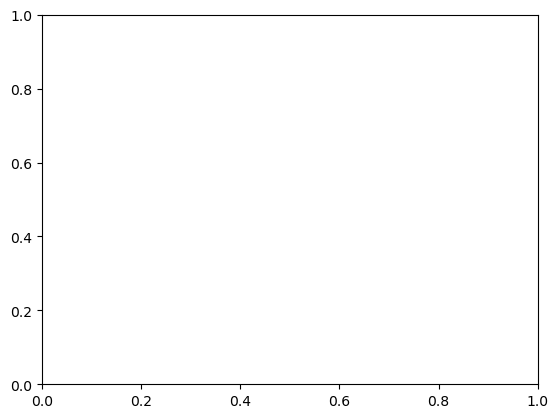

In [39]:
def dfScatter(df, xcol="x", ycol="y", catcol="ORP"):
    fig, ax = plt.subplots()
    categories = np.unique(df[catcol])
    print(categories)
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    df["Color"] = df[catcol].apply(lambda x: colordict[x])
    ax.scatter(df[xcol], df[ycol], c=df.Color)
    return fig

fig = dfScatter(data)



In [40]:
counts = data["ORP"].value_counts().to_frame()
counts.reset_index(inplace=True)
counts = counts.rename(columns = {'index':'ORP',"ORP":"counts"})
counts


ORP  counts
0    Hlavní město Praha  128440
1                  Brno   34223
2               Ostrava   31674
3                 Plzeň   15276
4               Liberec    8936
..                  ...     ...
201          Luhačovice     225
202        Železný Brod     216
203             Polička     215
204            Vizovice     190
205             Králíky     109

[206 rows x 2 columns]

In [41]:
paq_data = pd.read_csv("Data-pro-Python-DataPAQ.csv")
paq_data.columns

Index(['Kód ORP', 'Název ORP', 'Kód okresu', 'Název okresu', 'Kód kraje',
       'Název kraje', 'Lidé v exekuci (2021) [%]',
       'Lidé v exekuci (2021) / Průměr ČR [%]',
       'Lidé v exekuci (2021) / Průměr kraje [%]',
       'Lidé v exekuci (2021) / Průměr okresu [%]',
       'Lidé v exekuci (2021) / Průměr sociálně podobných ORP [%]',
       'Podíl lidí bez středního vzdělání (2021) [%]',
       'Podíl lidí bez středního vzdělání (2021) / Průměr ČR [%]',
       'Podíl lidí bez středního vzdělání (2021) / Průměr kraje [%]',
       'Podíl lidí bez středního vzdělání (2021) / Průměr okresu [%]',
       'Podíl lidí bez středního vzdělání (2021) / Průměr sociálně podobných ORP [%]',
       'Domácnosti čerpající přídavek na živobytí (2020) [%]',
       'Domácnosti čerpající přídavek na živobytí (2020) / Průměr ČR [%]',
       'Domácnosti čerpající přídavek na živobytí (2020) / Průměr kraje [%]',
       'Domácnosti čerpající přídavek na živobytí (2020) / Průměr okresu [%]',
       'Dom

In [42]:
paq_data.drop(['Propadání (průměr 2015–2021) / Průměr ČR [%]',
       'Propadání (průměr 2015–2021) / Průměr kraje [%]',
       'Propadání (průměr 2015–2021) / Průměr okresu [%]',
       'Propadání (průměr 2015–2021) / Průměr sociálně podobných ORP [%]',
       'Názvy sociálně podobných ORP', 'Kódy sociálně podobných ORP','Domácnosti čerpající přídavek na živobytí (2020) / Průměr ČR [%]',
       'Domácnosti čerpající přídavek na živobytí (2020) / Průměr kraje [%]',
       'Domácnosti čerpající přídavek na živobytí (2020) / Průměr okresu [%]',
       'Domácnosti čerpající přídavek na živobytí (2020) / Průměr sociálně podobných ORP [%]','Podíl lidí bez středního vzdělání (2021) / Průměr ČR [%]',
       'Podíl lidí bez středního vzdělání (2021) / Průměr kraje [%]',
       'Podíl lidí bez středního vzdělání (2021) / Průměr okresu [%]',
       'Podíl lidí bez středního vzdělání (2021) / Průměr sociálně podobných ORP [%]','Lidé v exekuci (2021) / Průměr ČR [%]',
       'Lidé v exekuci (2021) / Průměr kraje [%]',
       'Lidé v exekuci (2021) / Průměr okresu [%]',
       'Lidé v exekuci (2021) / Průměr sociálně podobných ORP [%]','Kód ORP','Kód okresu', 'Název okresu', 'Kód kraje',
       'Název kraje'],axis = 1,inplace=True)


In [43]:
paq_data.replace(to_replace="Praha",value="Hlavní město Praha",inplace=True)

In [44]:
table = reprojected.merge(counts,how="left",left_on=["NAZEV"],right_on=["ORP"])
table

KOD                 NAZEV OKRES_KOD NUTS3_KOD SPR_OB_KOD  \
0     761                 Kadaň      3503     CZ042     563102   
1     779    Jablonec nad Nisou      3504     CZ051     563510   
2     787               Tanvald      3504     CZ051     563820   
3     795          Železný Brod      3504     CZ051     563871   
4     809              Frýdlant      3505     CZ051     564028   
..    ...                   ...       ...       ...        ...   
201  2020               Šumperk      3809     CZ071     523704   
202  2038  Rožnov pod Radhoštěm      3810     CZ072     544841   
203  2046     Valašské Meziříčí      3810     CZ072     545058   
204  2054                Vsetín      3810     CZ072     541630   
205  2062               Jeseník      3811     CZ071     536385   

                                              geometry                   ORP  \
0    POLYGON ((13.43356 50.36894, 13.43005 50.36210...                 Kadaň   
1    POLYGON ((15.15200 50.84060, 15.16443 50.84090...    Jablonec nad Nisou   
2    POLYGON ((15.23190 50.82697, 15.24458 50.82463...               Tanvald   
3    POLYGON ((15.32375 50.67244, 15.32655 50.66461...          Železný Brod   
4    POLYGON ((14.99442 50.86943, 15.00204 50.86884...              Frýdlant   
..                                                 ...                   ...   
201  POLYGON ((16.76835 50.00715, 16.76689 50.01675...               Šumperk   
202  POLYGON ((18.07115 49.41971, 18.06935 49.43087...  Rožnov pod Radhoštěm   
203  POLYGON ((17.85869 49.40424, 17.83913 49.42309...     Valašské Meziříčí   
204  POLYGON ((18.07115 49.41971, 18.09172 49.40522...                Vsetín   
205  POLYGON ((17.27268 50.16011, 17.25886 50.14748...               Jeseník   

     counts  
0      1701  
1      3228  
2       929  
3       216  
4      1242  
..      ...  
201    2385  
202    1141  
203    1212  
204    1502  
205     867  

[206 rows x 8 columns]

In [45]:
table =table.merge(paq_data,how="left",left_on=["NAZEV"],right_on=["Název ORP"])
table.head(51)

KOD                   NAZEV OKRES_KOD NUTS3_KOD SPR_OB_KOD  \
0    761                   Kadaň      3503     CZ042     563102   
1    779      Jablonec nad Nisou      3504     CZ051     563510   
2    787                 Tanvald      3504     CZ051     563820   
3    795            Železný Brod      3504     CZ051     563871   
4    809                Frýdlant      3505     CZ051     564028   
5    817                 Liberec      3505     CZ051     563889   
6    825              Litoměřice      3506     CZ042     564567   
7    833                Lovosice      3506     CZ042     565229   
8    841      Roudnice nad Labem      3506     CZ042     565555   
9    850                   Louny      3507     CZ042     565971   
10   868               Podbořany      3507     CZ042     566616   
11   876                   Žatec      3507     CZ042     566985   
12   884                Litvínov      3508     CZ042     567256   
13   892                    Most      3508     CZ042     567027   
14   906                  Bílina      3509     CZ042     567451   
15   914                 Teplice      3509     CZ042     567442   
16   922          Ústí nad Labem      3510     CZ042     554804   
17   931                Chotěboř      3601     CZ063     568759   
18   949          Havlíčkův Brod      3601     CZ063     568414   
19   957      Světlá nad Sázavou      3601     CZ063     569569   
20   965          Hradec Králové      3602     CZ052     569810   
21   973             Nový Bydžov      3602     CZ052     570508   
22   981                 Chrudim      3603     CZ053     571164   
23   990                 Hlinsko      3603     CZ053     571393   
24  1007                  Hořice      3604     CZ052     572926   
25  1015                   Jičín      3604     CZ052     572659   
26  1023               Nová Paka      3604     CZ052     573248   
27  1031                 Broumov      3605     CZ052     573922   
28  1040                 Jaroměř      3605     CZ052     574121   
29  1058   Nové Město nad Metují      3605     CZ052     574279   
30  1066                  Náchod      3605     CZ052     573868   
31  1074                  Holice      3606     CZ053     574988   
32  1082               Pardubice      3606     CZ053     555134   
33  1091                 Přelouč      3606     CZ053     575500   
34  1104                Dobruška      3607     CZ052     576271   
35  1112     Kostelec nad Orlicí      3607     CZ052     576361   
36  1121     Rychnov nad Kněžnou      3607     CZ052     576069   
37  1139               Jilemnice      3608     CZ051     577197   
38  1147                  Semily      3608     CZ051     576964   
39  1155                  Turnov      3608     CZ051     577626   
40  1163                Litomyšl      3609     CZ053     578347   
41  1171        Moravská Třebová      3609     CZ053     578444   
42  1180                 Polička      3609     CZ053     578576   
43  1198                 Svitavy      3609     CZ053     577731   
44  1201  Dvůr Králové nad Labem      3610     CZ052     579203   
45  1210                 Trutnov      3610     CZ052     579025   
46  1228                Vrchlabí      3610     CZ052     579858   
47  1236                 Králíky      3611     CZ053     580481   
48  1244               Lanškroun      3611     CZ053     580511   
49  1252             Vysoké Mýto      3611     CZ053     581186   
50    19      Hlavní město Praha      9999     CZ010     554782   

                                             geometry                     ORP  \
0   POLYGON ((13.43356 50.36894, 13.43005 50.36210...                   Kadaň   
1   POLYGON ((15.15200 50.84060, 15.16443 50.84090...      Jablonec nad Nisou   
2   POLYGON ((15.23190 50.82697, 15.24458 50.82463...                 Tanvald   
3   POLYGON ((15.32375 50.67244, 15.32655 50.66461...            Železný Brod   
4   POLYGON ((14.99442 50.86943, 15.00204 50.86884...                Frýdlant   
5   POLYGON ((15.11364 50.65194, 1

In [46]:
CZ_COORDINATES = [49.8037633,15.4749126]

In [47]:
my_map = folium.Map(location = CZ_COORDINATES,zoom_start = 8.4)
my_map


In [48]:
table =table.fillna(0)

In [50]:
folium.Choropleth(
    geo_data=table,
    data=table,
    columns=["ORP", "counts"],
    key_on="feature.properties.ORP",
    fill_color="PuBu",
    bins=[0,200,500,1000,5000,200000],
    highlight=True,
).add_to(my_map)

In [51]:
my_map

In [52]:
foreclosure_map = folium.Map(location = CZ_COORDINATES,zoom_start = 8.4)
dropout_rate_map = folium.Map(location = CZ_COORDINATES,zoom_start = 8.4)
without_highschool_map = folium.Map(location = CZ_COORDINATES,zoom_start = 8.4)
benefits_map = folium.Map(location = CZ_COORDINATES,zoom_start = 8.4)

In [53]:
table

KOD                 NAZEV OKRES_KOD NUTS3_KOD SPR_OB_KOD  \
0     761                 Kadaň      3503     CZ042     563102   
1     779    Jablonec nad Nisou      3504     CZ051     563510   
2     787               Tanvald      3504     CZ051     563820   
3     795          Železný Brod      3504     CZ051     563871   
4     809              Frýdlant      3505     CZ051     564028   
..    ...                   ...       ...       ...        ...   
201  2020               Šumperk      3809     CZ071     523704   
202  2038  Rožnov pod Radhoštěm      3810     CZ072     544841   
203  2046     Valašské Meziříčí      3810     CZ072     545058   
204  2054                Vsetín      3810     CZ072     541630   
205  2062               Jeseník      3811     CZ071     536385   

                                              geometry                   ORP  \
0    POLYGON ((13.43356 50.36894, 13.43005 50.36210...                 Kadaň   
1    POLYGON ((15.15200 50.84060, 15.16443 50.84090...    Jablonec nad Nisou   
2    POLYGON ((15.23190 50.82697, 15.24458 50.82463...               Tanvald   
3    POLYGON ((15.32375 50.67244, 15.32655 50.66461...          Železný Brod   
4    POLYGON ((14.99442 50.86943, 15.00204 50.86884...              Frýdlant   
..                                                 ...                   ...   
201  POLYGON ((16.76835 50.00715, 16.76689 50.01675...               Šumperk   
202  POLYGON ((18.07115 49.41971, 18.06935 49.43087...  Rožnov pod Radhoštěm   
203  POLYGON ((17.85869 49.40424, 17.83913 49.42309...     Valašské Meziříčí   
204  POLYGON ((18.07115 49.41971, 18.09172 49.40522...                Vsetín   
205  POLYGON ((17.27268 50.16011, 17.25886 50.14748...               Jeseník   

     counts             Název ORP  Lidé v exekuci (2021) [%]  \
0      1701                 Kadaň                       11.8   
1      3228    Jablonec nad Nisou                        8.2   
2       929               Tanvald                        9.3   
3       216          Železný Brod                        4.8   
4      1242              Frýdlant                       10.3   
..      ...                   ...                        ...   
201    2385               Šumperk                        6.6   
202    1141  Rožnov pod Radhoštěm                        3.2   
203    1212     Valašské Meziříčí                        4.4   
204    1502                Vsetín                        3.9   
205     867               Jeseník                        8.6   

     Podíl lidí bez středního vzdělání (2021) [%]  \
0                                            20.4   
1                                            14.3   
2                                            17.5   
3                                            13.0   
4                                            18.4   
..                                            ...   
201                                          15.2   
202                                          14.0   
203                                          12.4   
204                                          14.1   
205                                          16.5   

     Domácnosti čerpající přídavek na živobytí (2020) [%]  \
0                                                  9.9      
1                                                  5.2      
2                                                 12.9      
3                                                  3.7      
4                                                  6.8      
..                                                 ...      
201                                                4.8      
202                                                0.7      
203                                                3.3      
204                                                3.0      
205                                                7.8      

     Propadání (průměr 2015–2021) [%]  
0                                 1.9  
1                                

In [54]:
folium.Choropleth(
    geo_data=table,
    data=table,
    columns=["ORP", "Podíl lidí bez středního vzdělání (2021) [%]"],
    key_on="feature.properties.ORP",
    fill_color="PuBu",
    highlight=True,
).add_to(without_highschool_map)
folium.Choropleth(
    geo_data=table,
    data=table,
    columns=["ORP", "Lidé v exekuci (2021) [%]"],
    key_on="feature.properties.ORP",
    fill_color="PuBu",
    highlight=True,
).add_to(foreclosure_map)
folium.Choropleth(
    geo_data=table,
    data=table,
    columns=["ORP", "Domácnosti čerpající přídavek na živobytí (2020) [%]"],
    key_on="feature.properties.ORP",
    fill_color="PuBu",
    highlight=True,
).add_to(benefits_map)
folium.Choropleth(
    geo_data=table,
    data=table,
    columns=["ORP", "Propadání (průměr 2015–2021) [%]"],
    key_on="feature.properties.ORP",
    fill_color="PuBu",
    highlight=True,
).add_to(dropout_rate_map)



In [55]:
dropout_rate_map

In [56]:
without_highschool_map

In [57]:
benefits_map

In [58]:
foreclosure_map

In [142]:
table

KOD                 NAZEV OKRES_KOD NUTS3_KOD SPR_OB_KOD  \
0     761                 Kadaň      3503     CZ042     563102   
1     779    Jablonec nad Nisou      3504     CZ051     563510   
2     787               Tanvald      3504     CZ051     563820   
3     795          Železný Brod      3504     CZ051     563871   
4     809              Frýdlant      3505     CZ051     564028   
..    ...                   ...       ...       ...        ...   
201  2020               Šumperk      3809     CZ071     523704   
202  2038  Rožnov pod Radhoštěm      3810     CZ072     544841   
203  2046     Valašské Meziříčí      3810     CZ072     545058   
204  2054                Vsetín      3810     CZ072     541630   
205  2062               Jeseník      3811     CZ071     536385   

                                              geometry                 ORP  \
0    POLYGON ((13.43356 50.36894, 13.43005 50.36210...               Kadaň   
1    POLYGON ((15.15200 50.84060, 15.16443 50.84090...  Jablonec nad Nisou   
2    POLYGON ((15.23190 50.82697, 15.24458 50.82463...             Tanvald   
3    POLYGON ((15.32375 50.67244, 15.32655 50.66461...        Železný Brod   
4    POLYGON ((14.99442 50.86943, 15.00204 50.86884...            Frýdlant   
..                                                 ...                 ...   
201  POLYGON ((16.76835 50.00715, 16.76689 50.01675...             Šumperk   
202  POLYGON ((18.07115 49.41971, 18.06935 49.43087...                   0   
203  POLYGON ((17.85869 49.40424, 17.83913 49.42309...   Valašské Meziříčí   
204  POLYGON ((18.07115 49.41971, 18.09172 49.40522...              Vsetín   
205  POLYGON ((17.27268 50.16011, 17.25886 50.14748...             Jeseník   

     counts             Název ORP  Lidé v exekuci (2021) [%]  \
0       3.0                 Kadaň                       11.8   
1       8.0    Jablonec nad Nisou                        8.2   
2      13.0               Tanvald                        9.3   
3       6.0          Železný Brod                        4.8   
4      26.0              Frýdlant                       10.3   
..      ...                   ...                        ...   
201    48.0               Šumperk                        6.6   
202     0.0  Rožnov pod Radhoštěm                        3.2   
203     3.0     Valašské Meziříčí                        4.4   
204    33.0                Vsetín                        3.9   
205    31.0               Jeseník                        8.6   

     Podíl lidí bez středního vzdělání (2021) [%]  \
0                                            20.4   
1                                            14.3   
2                                            17.5   
3                                            13.0   
4                                            18.4   
..                                            ...   
201                                          15.2   
202                                          14.0   
203                                          12.4   
204                                          14.1   
205                                          16.5   

     Domácnosti čerpající přídavek na živobytí (2020) [%]  \
0                                                  9.9      
1                                                  5.2      
2                                                 12.9      
3                                                  3.7      
4                                                  6.8      
..                                                 ...      
201                                                4.8      
202                                                0.7      
203                                                3.3      
204                                                3.0      
205                                                7.8      

     Propadání (průměr 2015–2021) [%]  
0                                 1.9  
1                                 1.7  
2                

<AxesSubplot:xlabel='Propadání (průměr 2015–2021) [%]', ylabel='counts'>

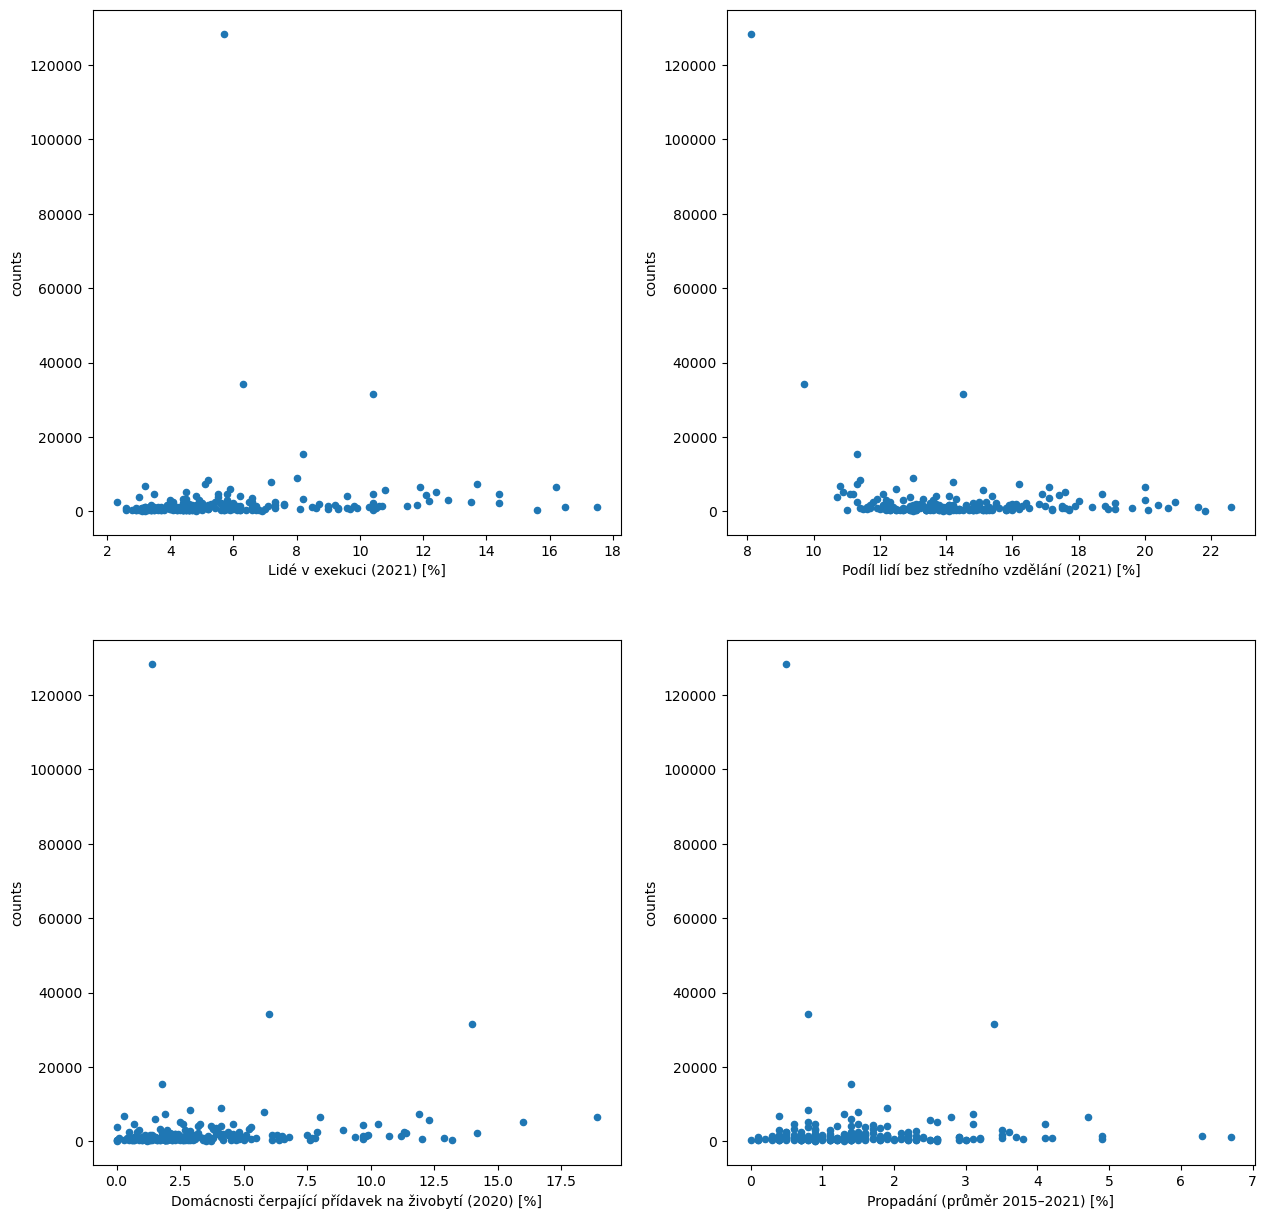

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

table.plot.scatter(x="Lidé v exekuci (2021) [%]",y="counts",ax=axes[0,0])
table.plot.scatter(x="Podíl lidí bez středního vzdělání (2021) [%]",y="counts",ax=axes[0,1])
table.plot.scatter(x="Domácnosti čerpající přídavek na živobytí (2020) [%]",y="counts",ax=axes[1,0])
table.plot.scatter(x="Propadání (průměr 2015–2021) [%]",y="counts",ax=axes[1,1])


In [60]:
table.corr()

counts  \
counts                                              1.000000   
Lidé v exekuci (2021) [%]                           0.075720   
Podíl lidí bez středního vzdělání (2021) [%]       -0.224556   
Domácnosti čerpající přídavek na živobytí (2020...  0.064406   
Propadání (průměr 2015–2021) [%]                   -0.036614   

                                                    Lidé v exekuci (2021) [%]  \
counts                                                               0.075720   
Lidé v exekuci (2021) [%]                                            1.000000   
Podíl lidí bez středního vzdělání (2021) [%]                         0.759776   
Domácnosti čerpající přídavek na živobytí (2020...                   0.809273   
Propadání (průměr 2015–2021) [%]                                     0.673518   

                                                    Podíl lidí bez středního vzdělání (2021) [%]  \
counts                                                                                 -0.224556   
Lidé v exekuci (2021) [%]                                                               0.759776   
Podíl lidí bez středního vzdělání (2021) [%]                                            1.000000   
Domácnosti čerpající přídavek na živobytí (2020...                                      0.602809   
Propadání (průměr 2015–2021) [%]                                                        0.639187   

                                                    Domácnosti čerpající přídavek na živobytí (2020) [%]  \
counts                                                                                       0.064406      
Lidé v exekuci (2021) [%]                                                                    0.809273      
Podíl lidí bez středního vzdělání (2021) [%]                                                 0.602809      
Domácnosti čerpající přídavek na živobytí (2020...                                           1.000000      
Propadání (průměr 2015–2021) [%]                                                             0.587039      

                                                    Propadání (průměr 2015–2021) [%]  
counts                                                                     -0.036614  
Lidé v exekuci (2021) [%]                                                   0.673518  
Podíl lidí bez středního vzdělání (2021) [%]                                0.639187  
Domácnosti čerpající přídavek na živobytí (2020...                          0.587039  
Propadání (průměr 2015–2021) [%]                                            1.000000